In [25]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/Users/subhadip/2nd Sem/Python'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/Users/subhadip/2nd Sem/Python/List, Tuples and Sets.ipynb
/Users/subhadip/2nd Sem/Python/MatplotLib-&-SeaBorn.ipynb
/Users/subhadip/2nd Sem/Python/Datatypes.ipynb
/Users/subhadip/2nd Sem/Python/songs.csv
/Users/subhadip/2nd Sem/Python/Untitled1.ipynb
/Users/subhadip/2nd Sem/Python/Untitled.ipynb
/Users/subhadip/2nd Sem/Python/2021.csv
/Users/subhadip/2nd Sem/Python/List.ipynb
/Users/subhadip/2nd Sem/Python/2023.csv
/Users/subhadip/2nd Sem/Python/2022.csv
/Users/subhadip/2nd Sem/Python/seattle-weather.csv
/Users/subhadip/2nd Sem/Python/ca1python.ipynb
/Users/subhadip/2nd Sem/Python/2024.csv
/Users/subhadip/2nd Sem/Python/Ca1Grp1.ipynb
/Users/subhadip/2nd Sem/Python/assign1.ipynb
/Users/subhadip/2nd Sem/Python/ufo_sightings_scrubbed.csv
/Users/subhadip/2nd Sem/Python/Day4.ipynb
/Users/subhadip/2nd Sem/Python/AI_Day1.ipynb
/Users/subhadip/2nd Sem/Python/Day3.ipynb
/Users/subhadip/2nd Sem/Python/plot.png
/Users/subhadip/2nd Sem/Python/Numpy&Pandas.ipynb
/Users/subhadip/2nd Sem/Python/assi

In [5]:
df=pd.read_csv('/Users/subhadip/2nd Sem/Python/ufo_sightings_scrubbed.csv')

/var/folders/ps/94tl90gj0bxgk7s6czfs42kh0000gn/T/ipykernel_64107/3046131587.py:1: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/Users/subhadip/2nd Sem/Python/ufo_sightings_scrubbed.csv')


In [7]:
df.head(3)

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,2004-04-27,29.8830556,-97.941111
1,1949-10-10 21:00:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,2005-12-16,29.38421,-98.581082
2,1955-10-10 17:00:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,2008-01-21,53.2,-2.916667


In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   datetime              80332 non-null  object 
 1   city                  80332 non-null  object 
 2   state                 74535 non-null  object 
 3   country               70662 non-null  object 
 4   shape                 78400 non-null  object 
 5   duration (seconds)    80332 non-null  object 
 6   duration (hours/min)  80332 non-null  object 
 7   comments              80317 non-null  object 
 8   date posted           80332 non-null  object 
 9   latitude              80332 non-null  object 
 10  longitude             80332 non-null  float64
dtypes: float64(1), object(10)
memory usage: 6.7+ MB


In [11]:
df['datetime']=pd.to_datetime(df['datetime'])
df['date posted']=pd.to_datetime(df['date posted'])
df['year'] = df['date posted'].dt.year


def capitalize(city):
    if isinstance(city, str):
        return city.title()
    return city
df['city'] = df['city'].apply(capitalize)

def title(state):
    if pd.isnull(state):
        return state
    return state.upper()
df['state'] = df['state'].apply(title)
def title(country):
    if pd.isnull(country):
        return country
    return country.upper()
df['country'] = df['country'].apply(title)

def capitalize(shape):
    if isinstance(shape,str):
        return shape[0].upper() + shape[1:] if shape else shape
    return shape
df['shape'] = df['shape'].apply(capitalize)


df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')

In [13]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   datetime              80332 non-null  datetime64[ns]
 1   city                  80332 non-null  object        
 2   state                 74535 non-null  object        
 3   country               70662 non-null  object        
 4   shape                 78400 non-null  object        
 5   duration (seconds)    80332 non-null  object        
 6   duration (hours/min)  80332 non-null  object        
 7   comments              80317 non-null  object        
 8   date posted           80332 non-null  datetime64[ns]
 9   latitude              80331 non-null  float64       
 10  longitude             80332 non-null  float64       
 11  year                  80332 non-null  int32         
dtypes: datetime64[ns](2), float64(2), int32(1), object(7)
memory usage: 7.0+ M

In [15]:
df.head(3)


,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,year
0,1949-10-10 20:30:00,San Marcos,TX,US,Cylinder,2700,45 minutes,This event took place in early fall around 194...,2004-04-27,29.883056,-97.941111,2004
1,1949-10-10 21:00:00,Lackland Afb,TX,NaN,Light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,2005-12-16,29.384210,-98.581082,2005
2,1955-10-10 17:00:00,Chester (Uk/England),NaN,GB,Circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,2008-01-21,53.200000,-2.916667,2008


In [17]:
df.columns = df.columns.str.lower()
print(df.columns)

Index(['datetime', 'city', 'state', 'country', 'shape', 'duration (seconds)',
       'duration (hours/min)', 'comments', 'date posted', 'latitude',
       'longitude ', 'year'],
      dtype='object')


In [19]:
df.columns = df.columns.str.strip()
print(df.columns)

Index(['datetime', 'city', 'state', 'country', 'shape', 'duration (seconds)',
       'duration (hours/min)', 'comments', 'date posted', 'latitude',
       'longitude', 'year'],
      dtype='object')


Text(0.5, 1.0, 'Top 10 City to UFO Cases')

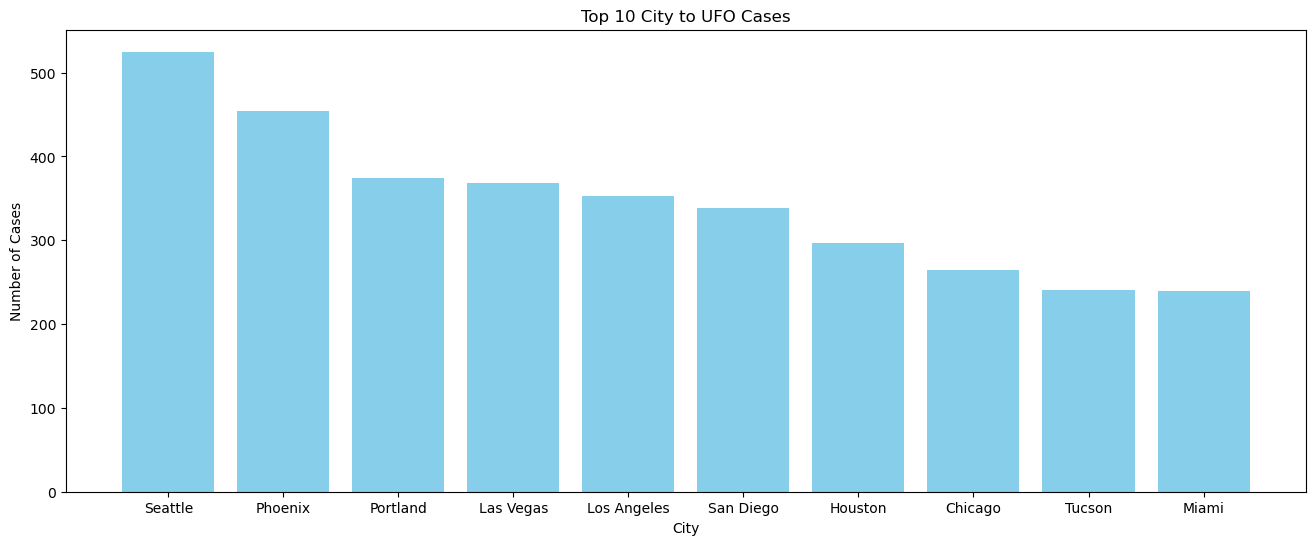

In [21]:
city_counts = df['city'].value_counts().head(10)

plt.figure(figsize=(16,6))
plt.bar(city_counts.index, city_counts.values, color='skyblue')
plt.xlabel("City")
plt.ylabel("Number of Cases")
plt.title("Top 10 City to UFO Cases")

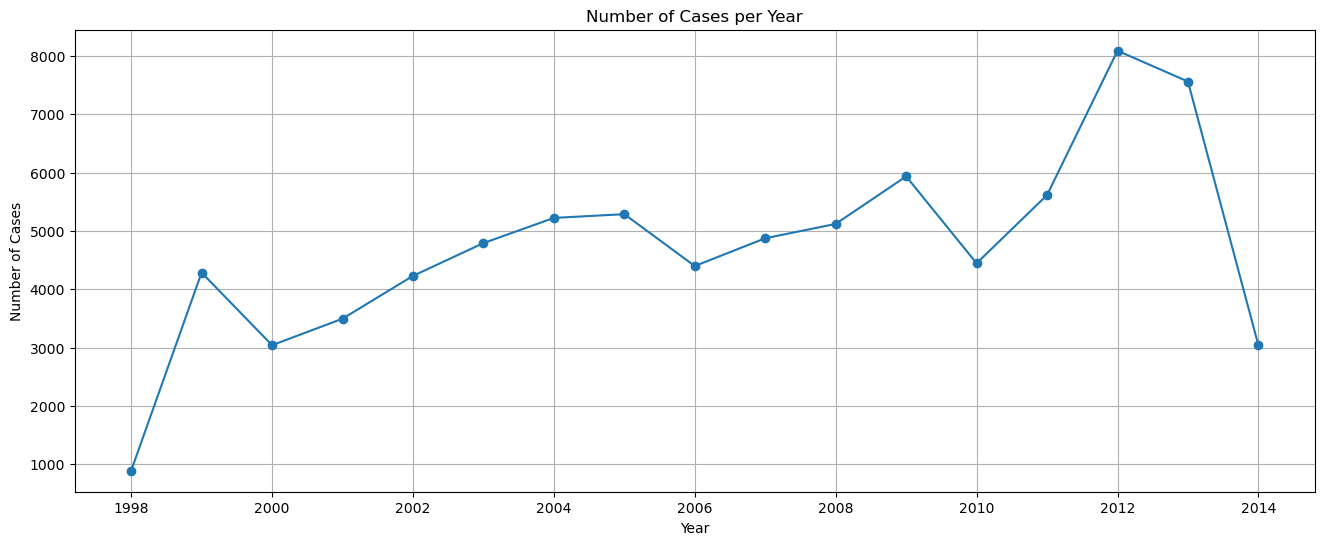

In [23]:
yearly_counts = df['date posted'].dt.year.value_counts().sort_index()

plt.figure(figsize=(16,6))
plt.plot(yearly_counts.index, yearly_counts.values, marker='o', linestyle='-')
plt.xlabel("Year")
plt.ylabel("Number of Cases")
plt.title("Number of Cases per Year")
plt.grid(True)
plt.show()